# Exploratory Data Analysis

The main motive here is to understand the dataset properly, figure out the preprocessing steps needed, check the distributions, and finally get te final list of important features which will be used for model selection.

### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Read dataset into pandas dataframe

Preliminary visual analysis on the data gave a couple of pointers to properly read the data into a dataframe:
- Separator used is ';'
- Decimal character is ','
- Missing values are represented as 'NA'

In [3]:
df = pd.read_csv('train.csv', sep=';', decimal=',', na_values=['NA',])
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v17,v18,v19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


### Separate target from data

In [4]:
X_train = df.drop(['classLabel'], axis='columns')
y_train = df['classLabel']

### Analyse dataset

Lets have an overall statistical description of the dataset's numeric features.

In [5]:
X_train.describe(percentiles=(0.25, 0.5, 0.75, 0.9, 0.95))

,v2,v3,v8,v11,v14,v15,v17,v19
count,3661.000000,3700.000000,3700.000000,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,32.820713,0.000585,3.439496,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,12.666181,0.000540,4.335229,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,23.000000,0.000150,0.500000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,28.670000,0.000425,1.750000,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,40.830000,0.000963,5.000000,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
90%,51.830000,0.001275,8.665000,11.000000,393.000000,4007.100000,3.930000e+06,1.000000
95%,57.830000,0.001500,14.000000,15.000000,440.000000,10561.000000,4.400000e+06,1.000000
max,80.250000,0.002800,28.500000,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [6]:
X_train.median().to_dict()

{'v2': 28.67,
 'v3': 0.000425,
 'v8': 1.75,
 'v11': 2.0,
 'v14': 120.0,
 'v15': 113.0,
 'v17': 1200000.0,
 'v19': 1.0}

In [7]:
(X_train.quantile(0.75) - X_train.quantile(0.25)).to_dict()

{'v2': 17.83,
 'v3': 0.0008125000000000001,
 'v8': 4.5,
 'v11': 6.0,
 'v14': 280.0,
 'v15': 1059.75,
 'v17': 2800000.0,
 'v19': 0.0}

Clearly there the dataset has outliers.

Now, lets check the dataset column datatypes

In [8]:
pd.DataFrame({
    'dtypes': X_train.dtypes,
    'unique_values': X_train.nunique()
})

,dtypes,unique_values
v1,object,2
v2,float64,288
v3,float64,179
v4,object,3
v5,object,3
v6,object,14
v7,object,9
v8,float64,118
v9,object,2
v10,object,2


So, the dataset has a total of 18 features (8 numeric and 10 categorical). The response variable is categorical, which confirms that we are dealing with a classification task.

One interesting observation is that column **v19** has a numeric datatype however has only two unique values, so we can consider it as a categorical variable instead.

Let's convert the datatype of the categorical features from *object* to *categorical* and also convert **v19** to categorical

In [9]:
for column in X_train.columns.values:
    if X_train[column].dtype == 'object':
        X_train[column] = X_train[column].astype('category', ordered=False)
X_train['v19'] = X_train['v19'].astype('category', ordered=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
v1            3661 non-null object
v2            3661 non-null float64
v3            3700 non-null float64
v4            3636 non-null object
v5            3636 non-null object
v6            3634 non-null object
v7            3634 non-null object
v8            3700 non-null float64
v9            3700 non-null object
v10           3700 non-null object
v11           3700 non-null int64
v12           3700 non-null object
v13           3700 non-null object
v14           3600 non-null float64
v15           3700 non-null int64
v17           3600 non-null float64
v18           1555 non-null object
v19           3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 549.3+ KB


There are missing values in some of the columns. Let's find the relative fraction of missing values for each of the columns.

In [10]:
X_train.isna().sum() / X_train.shape[0]

v1     0.010541
v2     0.010541
v3     0.000000
v4     0.017297
v5     0.017297
v6     0.017838
v7     0.017838
v8     0.000000
v9     0.000000
v10    0.000000
v11    0.000000
v12    0.000000
v13    0.000000
v14    0.027027
v15    0.000000
v17    0.027027
v18    0.579730
v19    0.000000
dtype: float64

Most features do not have missing values more than 2%, although feature **v18** has a high missing value rate of 58%

### Checking distributions

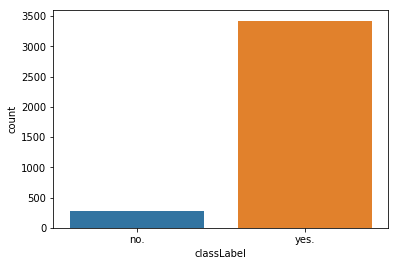

In [11]:
sns.countplot(y_train)

In [12]:
y_train.value_counts()

yes.    3424
no.      276
Name: classLabel, dtype: int64

So, a very high degree of class imbalance can be seen here. A careful stratified splitting strategy must be used to split the data later. Also, straight off we have to reject **accuracy** to be a reliable metric for evaluating our model as a dummy classifier always predicting *yes.* will have a high degree of accuracy. 

Next, In order to deal with missing values, it is best to first check each of the columns before imputing values to prevent the dataset becoming biased.

In [13]:
numerical_features_df = X_train.select_dtypes(exclude='category')
categorical_features_df = X_train.select_dtypes(include='category')

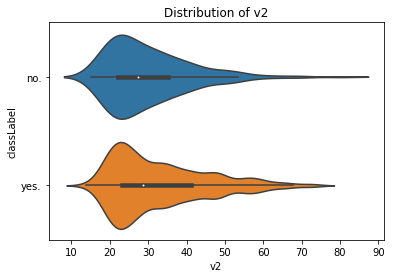

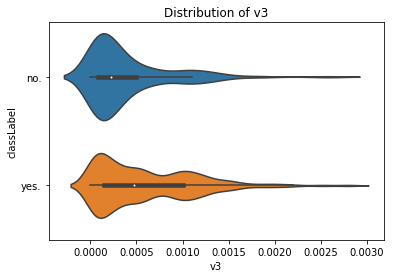

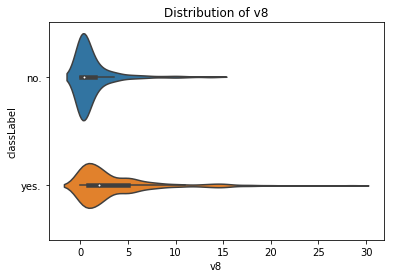

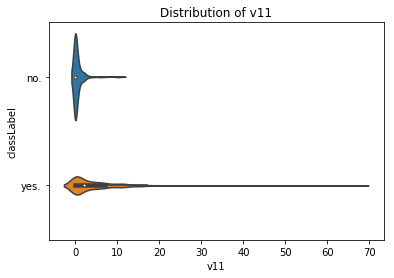

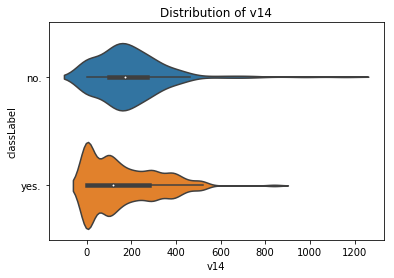

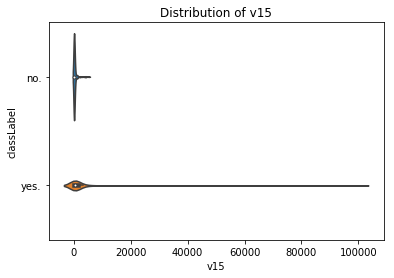

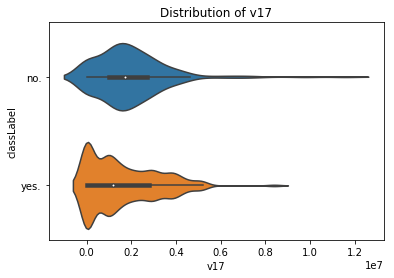

In [14]:
for column in numerical_features_df:
    plt.figure()
    sns.violinplot(x=column, y='classLabel', data=df)
    plt.xlabel(column)
    plt.ylabel('classLabel')
    plt.title('Distribution of {}'.format(column))

As seen previously, some features have an issue of outliers.

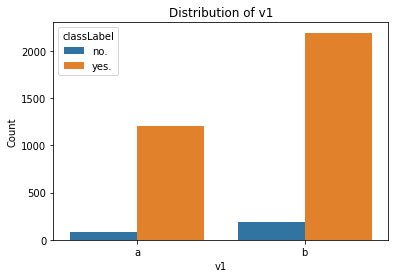

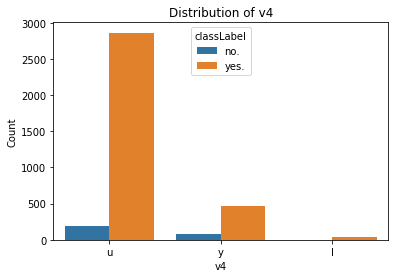

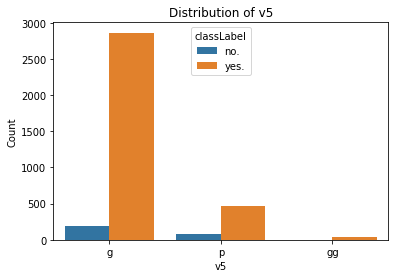

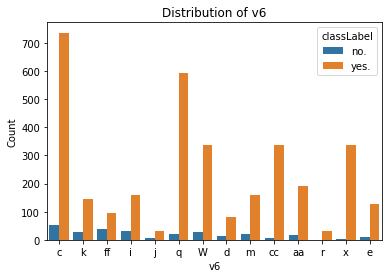

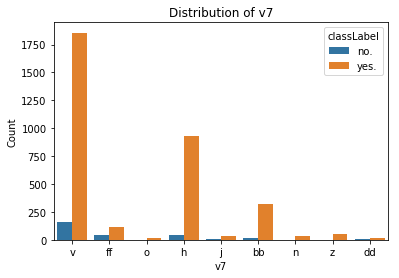

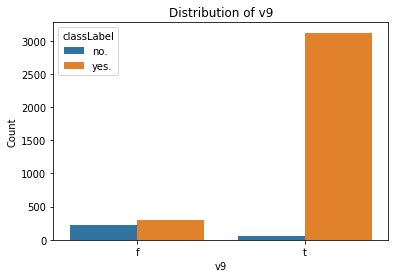

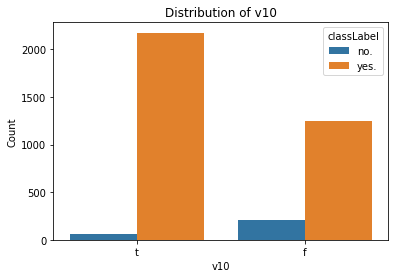

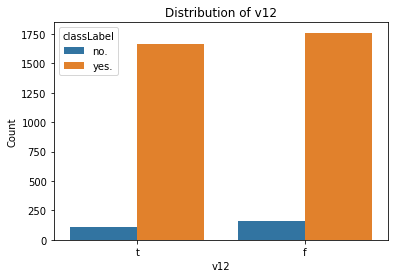

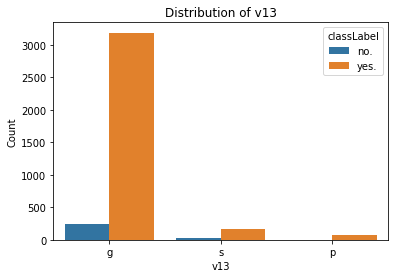

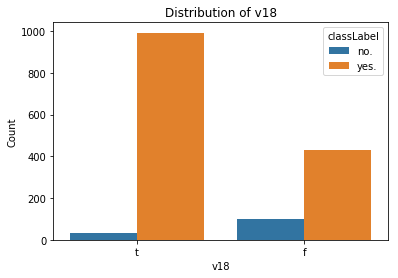

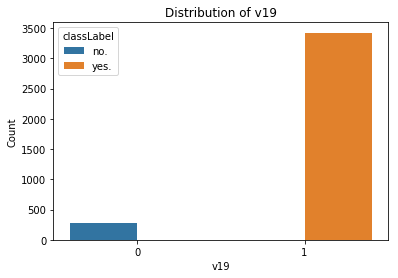

In [15]:
for column in categorical_features_df:
    plt.figure()
    sns.countplot(x=column, data=df, hue='classLabel')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(column))

All the features seemed to have skewed distributions with a very sharp peak meaning imputing using median should not introduce too much of a data bias.

### Handling missing values

So as the final strategy to handle missing values, the column **v18** will be dropped and:
- numeric columns will be imputed with median
- categorical columns will be imputed with a new value 'missing'

In [16]:
X_train.drop('v18', axis='columns', inplace=True)

In [17]:
X_train.fillna(X_train.median(), inplace=True)

In [18]:
categorical_columns_with_na = X_train.columns.values[X_train.isna().any()]
for column in categorical_columns_with_na:
    X_train[column] = X_train[column].cat.add_categories(['missing'])
    X_train[column].fillna('missing', inplace=True)

In [19]:
X_train.isna().sum()

v1     0
v2     0
v3     0
v4     0
v5     0
v6     0
v7     0
v8     0
v9     0
v10    0
v11    0
v12    0
v13    0
v14    0
v15    0
v17    0
v19    0
dtype: int64

Now the dataframe is free from missing values

### Encoding

In [20]:
X_train_final = pd.get_dummies(X_train, drop_first=True)
X_train_final.columns.values

array(['v2', 'v3', 'v8', 'v11', 'v14', 'v15', 'v17', 'v1_b', 'v1_missing',
       'v4_u', 'v4_y', 'v4_missing', 'v5_gg', 'v5_p', 'v5_missing',
       'v6_aa', 'v6_c', 'v6_cc', 'v6_d', 'v6_e', 'v6_ff', 'v6_i', 'v6_j',
       'v6_k', 'v6_m', 'v6_q', 'v6_r', 'v6_x', 'v6_missing', 'v7_dd',
       'v7_ff', 'v7_h', 'v7_j', 'v7_n', 'v7_o', 'v7_v', 'v7_z',
       'v7_missing', 'v9_t', 'v10_t', 'v12_t', 'v13_p', 'v13_s', 'v19_1'],
      dtype=object)

Now all the columns are properly encoded, however, it surely has a lot of correlations and redundant features. So, analysis is needed to understand correlations and feature importances.

In [21]:
y_train = y_train.map({
    'no.': 0,
    'yes.': 1
})

### Checking correlations

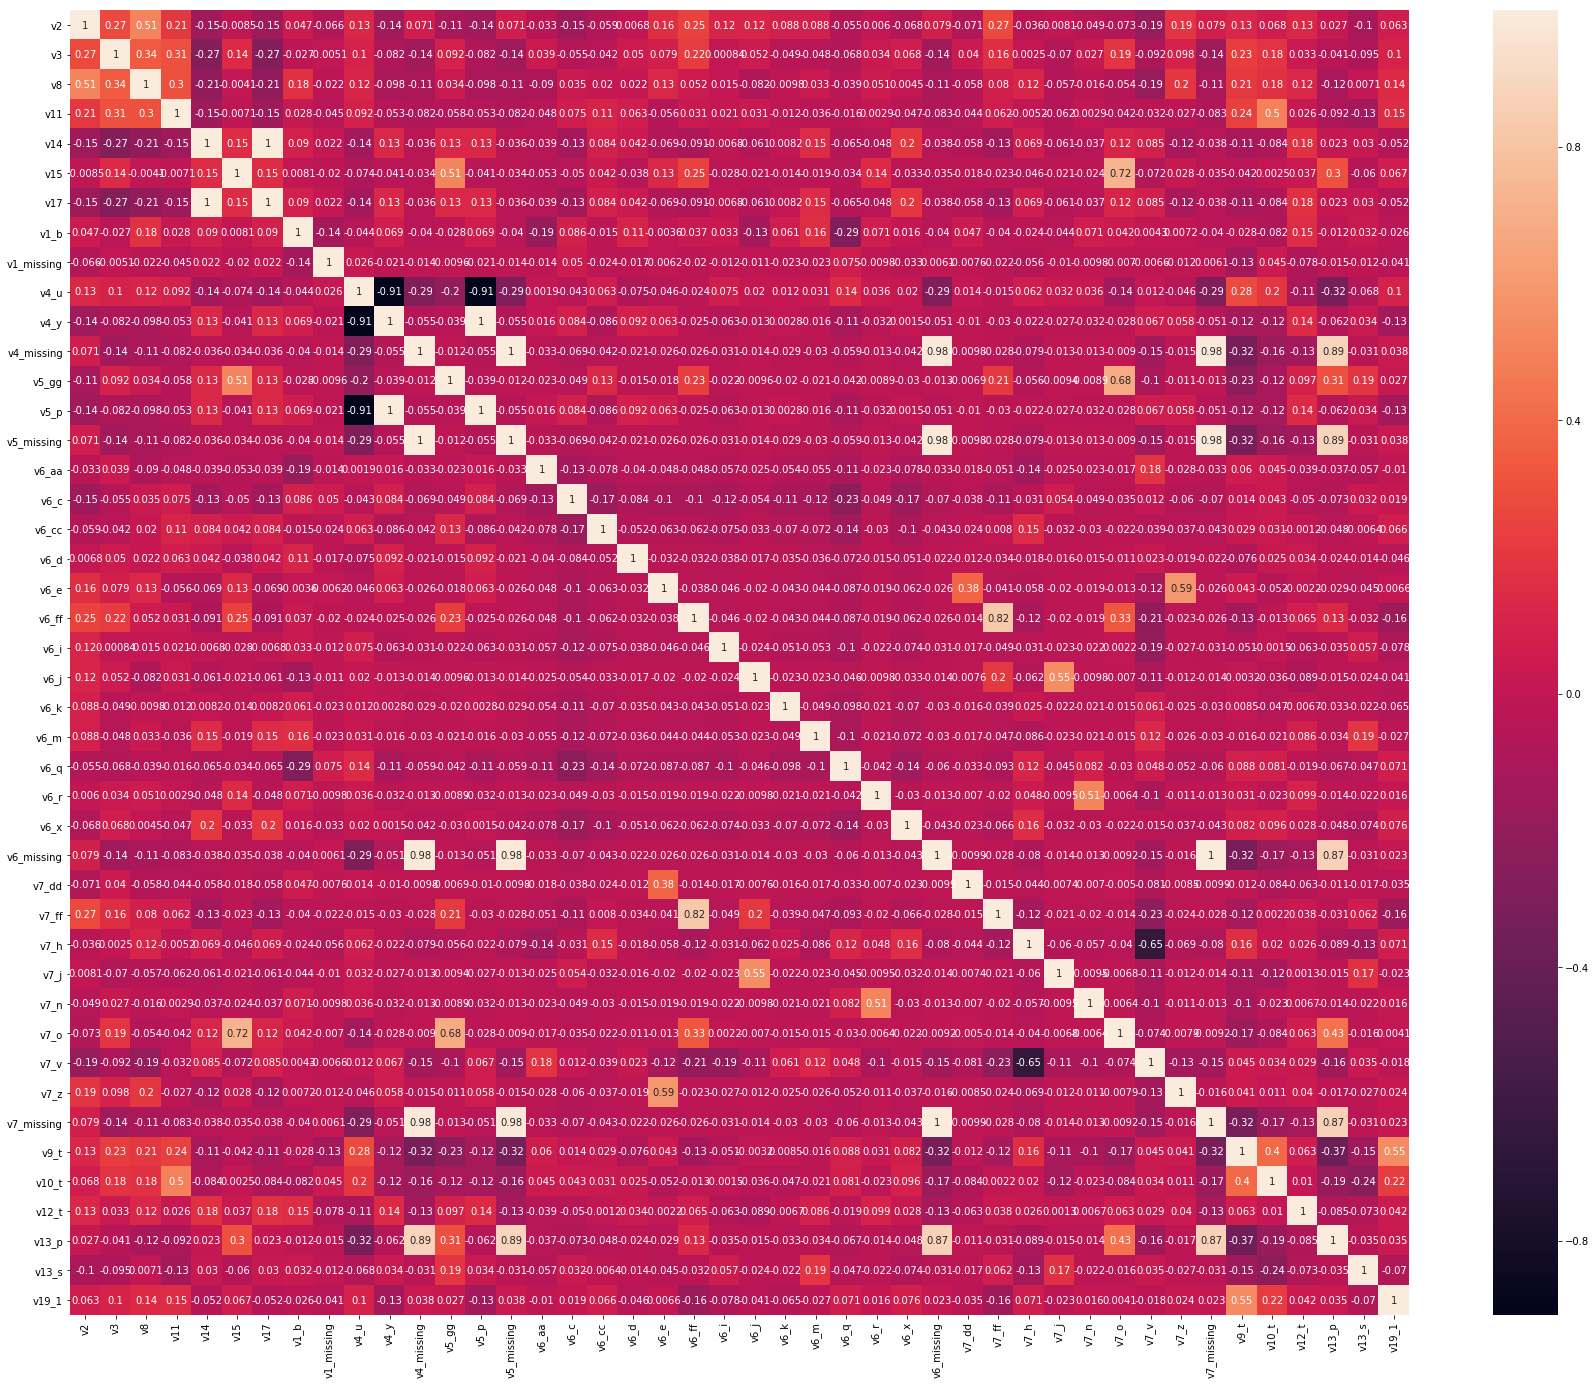

In [22]:
plt.figure(figsize=(30, 24))
sns.heatmap(X_train_final.corr(), annot=True)

As expected, there is a big degree of correlations between some features. However, most features seem to be independent.

Some pairs are perfectly correlated (ignoring **missing** features):
**v14** and **v17**
**v5_p** and **v4_u**
**v4_u** and **v4_y**

So columns **v14** and **v4_u** will be dropped.

In [23]:
redundant_columns = ['v14', 'v4_u']
X_train_final.drop(redundant_columns, axis='columns', inplace=True)

### Feature Importances

In [24]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(X_train_final, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X_train_final.columns.values)
feature_importances.sort_values(ascending=False, inplace=True)

Text(0.5, 1.0, 'Feature Importances')

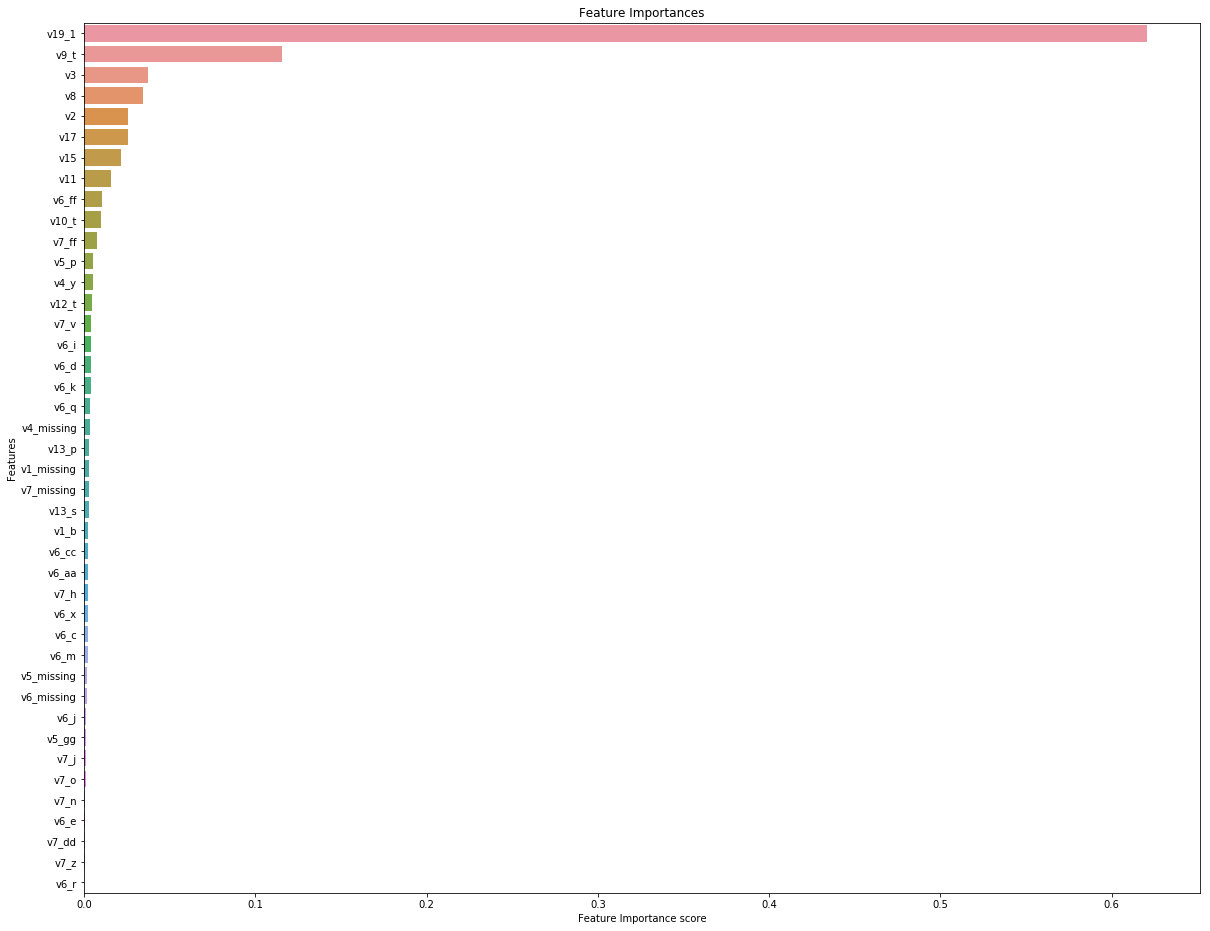

In [25]:
plt.figure(figsize=(20, 16))
sns.barplot(x=feature_importances.values, y=feature_importances.index.values, orient='h')
plt.ylabel('Features')
plt.xlabel('Feature Importance score')
plt.title('Feature Importances')

As evident from the previous visualization, feature **v19** is a very strong predictor closely followed by **v9**. Feature importances diminish quickly for all remaining features and more than 60% of the features seem insignificant.